In [1]:
from google.colab import drive  
drive._mount('/content/drive') 

Mounted at /content/drive


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%cd /content
import gdown
url='https://drive.google.com/u/3/uc?export=download&confirm=92Xo&id=193MqBS4yHQXwBtAJdjuLlncj0S506SGt'
output='messages.zip'
gdown.download(url, output, quiet=False)

/content


Downloading...
From: https://drive.google.com/u/3/uc?export=download&confirm=92Xo&id=193MqBS4yHQXwBtAJdjuLlncj0S506SGt
To: /content/messages.zip
100%|██████████| 1.75G/1.75G [00:22<00:00, 78.3MB/s]


'messages.zip'

In [4]:
# %cd /content
# !gdown https://drive.google.com/u/0/uc?id=1KEjyzDq5ADnmI7lP4SHnEmtvTSMfKD4k

In [5]:
!unzip messages.zip
!rm messages.zip

Streaming output truncated to the last 5000 lines.
  inflating: valid/images/02577.jpg  
  inflating: valid/images/02003.jpg  
  inflating: valid/images/01639.jpg  
  inflating: valid/images/03932.jpg  
  inflating: valid/images/01525.jpg  
  inflating: valid/images/01672.jpg  
  inflating: valid/images/03605.jpg  
  inflating: valid/images/01937.jpg  
  inflating: valid/images/02143.jpg  
  inflating: valid/images/02736.jpg  
  inflating: valid/images/03508.jpg  
  inflating: valid/images/00867.jpg  
  inflating: valid/images/01986.jpg  
  inflating: valid/images/03039.jpg  
  inflating: valid/images/03781.jpg  
  inflating: valid/images/02195.jpg  
  inflating: valid/images/00566.jpg  
  inflating: valid/images/01883.jpg  
  inflating: valid/images/01468.jpg  
  inflating: valid/images/01529.jpg  
  inflating: valid/images/00946.jpg  
  inflating: valid/images/00769.jpg  
  inflating: valid/images/00574.jpg  
  inflating: valid/images/01197.jpg  
  inflating: valid/images/03409.jpg  

In [ ]:
%cd /content/drive/MyDrive/ds101/ds101f21project-group07
from PIL import Image
from char_classifier import CharClassifier
classifier = CharClassifier()
classifier.build_model()

/content/drive/MyDrive/ds101/ds101f21project-group07
Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 conv2d_15 (Conv2D)          (None, 5, 5, 256)         327936    
                                                                 
 conv2d_16 (Conv2D)          (None, 4, 4, 128)         131200    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 128)        0         
 2D)                                                             
                                                                 
 conv2

In [ ]:
classifier.model.load_weights('models/char_weight.hdf5')

In [ ]:
classifier.train()

Epoch 1/100
1250/1250 [==============================] - ETA: 0s - loss: 0.3464 - sparse_categorical_accuracy: 0.8981
Epoch 00001: val_loss improved from inf to 0.82370, saving model to /content/drive/MyDrive/ds101/ds101f21project-group07/models/char_weight.hdf5
1250/1250 [==============================] - 368s 294ms/step - loss: 0.3464 - sparse_categorical_accuracy: 0.8981 - val_loss: 0.8237 - val_sparse_categorical_accuracy: 0.7897
Epoch 2/100
1250/1250 [==============================] - ETA: 0s - loss: 0.3048 - sparse_categorical_accuracy: 0.9114
Epoch 00002: val_loss improved from 0.82370 to 0.59229, saving model to /content/drive/MyDrive/ds101/ds101f21project-group07/models/char_weight.hdf5
1250/1250 [==============================] - 374s 299ms/step - loss: 0.3048 - sparse_categorical_accuracy: 0.9114 - val_loss: 0.5923 - val_sparse_categorical_accuracy: 0.8490
Epoch 3/100
1250/1250 [==============================] - ETA: 0s - loss: 0.2194 - sparse_categorical_accuracy: 0.9346
Ep

In [6]:
%cd /content/drive/MyDrive/ds101/ds101f21project-group07
from data_generator import parse_annotation_xml
valid_images, _ = parse_annotation_xml('/content/valid/anns','/content/valid/images')

/content/drive/MyDrive/ds101/ds101f21project-group07


/content/drive/MyDrive/ds101/ds101f21project-group07
Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 160, 160, 3)]     0         
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 conv2d_57 (Conv2D)          (None, 5, 5, 256)         327936    
                                                                 
 conv2d_58 (Conv2D)          (None, 4, 4, 128)         131200    
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 2, 2, 128)        0         
 g2D)                                                            
                                                                 
 conv

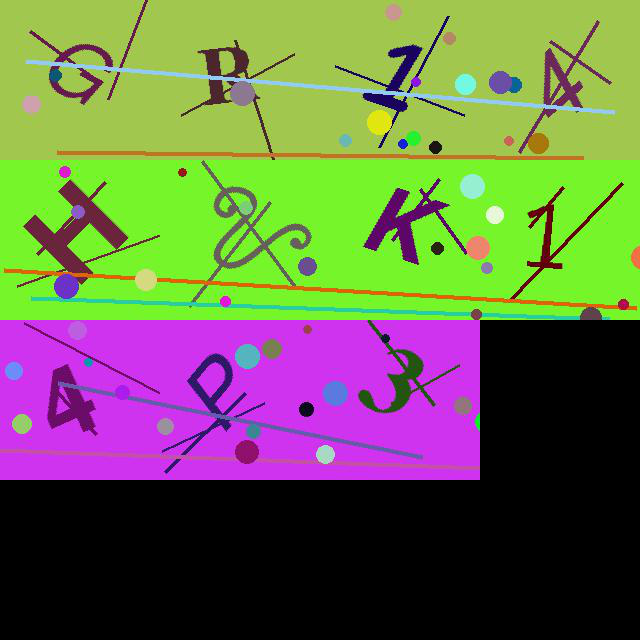

In [ ]:
%cd /content/drive/MyDrive/ds101/ds101f21project-group07
from PIL import Image, ImageDraw
from PIL import Image
from char_classifier import CharClassifier
classifier = CharClassifier()
classifier.build_model()
classifier.model.load_weights('models/char_weight.hdf5')
import numpy as np
idx = 970
image_info = valid_images[idx]
filename = image_info['filename']
image = Image.open(filename)
print("Chuỗi nhận dạng là: "+classifier.predict(image))
image

In [ ]:
import pandas as pd
data = pd.read_csv('/content/data.v3.valid.csv')
input_labels = [
      '0', '1', '2', '3', '4', '5', '6', '7', '8', 
      '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 
      'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 
      'T', 'U', 'V', 'W', 'X', 'Y', 'Z','PAD'
    ]
input_map={c:idx for idx, c in enumerate(input_labels)}
output_labels =[
  ' ', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 
  'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 
  'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'PAD'
]
output_map={c:idx for idx, c in enumerate(output_labels)}
list_input = []
list_output = []
for idx, row in data.iterrows():
  enc_msg = [input_map[c] for c in row['enc']]
  np_enc_msg = input_map['PAD']*np.ones(16)
  np_enc_msg[:len(enc_msg)]=enc_msg

  raw_msg = [output_map[c] for c in row['msg']]
  np_raw_msg = output_map['PAD']*np.ones(16)
  np_raw_msg[:len(raw_msg)]=raw_msg

  list_input.append(np_enc_msg)
  list_output.append(np_raw_msg)
list_input=np.array(list_input)
print(list_output[0])
print(list_input[0])
data.iloc[0]

[20. 11. 11. 19.  3.  0. 18.  5. 19. 26. 26. 11.  5.  7.  2. 27.]
[19. 17.  3. 20. 25. 33. 13.  7. 28. 16. 32.  8. 21.  1. 13. 36.]


msg    TKKSC RESZZKEGB
enc    JH3KPXD7SGW8L1D
Name: 0, dtype: object

In [ ]:
%cd /content/drive/MyDrive/ds101/ds101f21project-group07
from descrypter import Descrypter
dec = Descrypter()
dec.build_model()

/content/drive/MyDrive/ds101/ds101f21project-group07
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16)]              0         
                                                                 
 embedding (Embedding)       (None, 16, 512)           18944     
                                                                 
 bidirectional (Bidirectiona  (None, 16, 256)          1574912   
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 16, 128)          394240    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 16, 64)           98816     
 nal)                                                            
        

In [ ]:
dec.model.load_weights('models/dec_weight.hdf5')


In [ ]:
dec.train()

Epoch 1/100
1250/1250 [==============================] - ETA: 0s - loss: 0.1281 - sparse_categorical_accuracy: 0.9591
Epoch 00001: val_loss improved from inf to 0.20712, saving model to /content/drive/MyDrive/ds101/ds101f21project-group07/models/dec_weight.hdf5
1250/1250 [==============================] - 98s 70ms/step - loss: 0.1281 - sparse_categorical_accuracy: 0.9591 - val_loss: 0.2071 - val_sparse_categorical_accuracy: 0.9313
Epoch 2/100
1250/1250 [==============================] - ETA: 0s - loss: 0.1251 - sparse_categorical_accuracy: 0.9603
Epoch 00002: val_loss did not improve from 0.20712
1250/1250 [==============================] - 81s 65ms/step - loss: 0.1251 - sparse_categorical_accuracy: 0.9603 - val_loss: 0.2073 - val_sparse_categorical_accuracy: 0.9314
Epoch 3/100
1250/1250 [==============================] - ETA: 0s - loss: 0.1513 - sparse_categorical_accuracy: 0.9539
Epoch 00003: val_loss improved from 0.20712 to 0.20491, saving model to /content/drive/MyDrive/ds101/ds10

In [7]:
from PIL import Image, ImageDraw
from PIL import Image
from decoder import Decoder
import numpy as np
decode = Decoder()
decode.load_model()
idx = 200
image_info = valid_images[idx]
filename = image_info['filename']
image = Image.open(filename)
print(decode.predict(image))
# image

('XA6MFZG3', 'TAX WQBQ')


In [8]:
decode.classifier.model.save('/content/drive/MyDrive/ds101/ds101f21project-group07/models/char_model.hdf5')
decode.descrypter.model.save('/content/drive/MyDrive/ds101/ds101f21project-group07/models/dec_model.hdf5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
dec.predict('JH3KPXD7SGW8L1D')

'TKKKC RJZJJJEZB'

In [ ]:
result = dec.model.predict(np.array([list_input[0]]))

# result[0]

17

In [ ]:
print(sorted(list(train_labels)))

In [ ]:
train_images, train_labels = parse_annotation_xml('/content/train/anns','/content/train/images')
print(train_labels)

In [ ]:
%cd /content/drive/MyDrive/ds101/ds101f21project-group07
from data_generator import parse_annotation_xml
valid_images, _ = parse_annotation_xml('/content/valid/anns','content/valid/images')

In [ ]:
!python generate_anchors.py

In [ ]:
%cd /content/drive/MyDrive/ds101f21ex09-DarkDipper
p.encoder.save('models/encoder.h5')
p.decoder.save('models/decoder.h5')

In [ ]:
# %cd /content/drive/MyDrive/ds101f21ex09-DarkDipper
from PIL import Image
from painter import Painter
p1 = Painter()
p1.load_model()

In [ ]:
content_image = Image.open('samples/content1.jpg')
style_image = Image.open('samples/style3.jpg')

In [ ]:
generated_image = p1.predict(content_image, style_image)
generated_image